In [1]:
from torch import nn, Tensor

# Creator imports
from elasticai.creator.nn import Sequential
from elasticai.creator.nn.fixed_point import Linear, Tanh, BatchNormedLinear

from package.dnn.template.dataset.autoencoder import prepare_training
from package.dnn.dnn_handler import Config_ML_Pipeline, DefaultSettings_MLPipe
from package.yaml_handler import yaml_config_handler
from package.dnn.pytorch_dataclass import (Config_Dataset, DefaultSettingsDataset)
from package.dnn.pytorch_handler import __model_settings_common
from package.plot.plot_dnn import results_training
from package.dnn.pytorch_dataclass import DefaultSettingsTrainMSE
from package.dnn.pytorch_handler import ModelRegistry
from package.dnn.pytorch_dataclass import Config_PyTorch
from datetime import datetime, date
from package.dnn.pytorch_pipeline import do_train_autoencoder
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
yaml_handler = yaml_config_handler(DefaultSettings_MLPipe, 'config', 'Config_DNN')
dnn_handler = yaml_handler.get_class(Config_ML_Pipeline)
yaml_name_index='Config_AE'


yaml_data = yaml_config_handler(DefaultSettingsDataset, dnn_handler.get_path2config, f'{yaml_name_index}_Dataset')
config_data = yaml_data.get_class(Config_Dataset)

models_available = ModelRegistry()

... read YAML file: /home/silas/PycharmProjects/denspp.offline/3_Python/config/Config_DNN.yaml
... read YAML file: /home/silas/PycharmProjects/denspp.offline/3_Python/config/Config_AE_Dataset.yaml


In [3]:
dataset = prepare_training(settings=config_data, do_classification=False,
                            mode_train_ae=dnn_handler.autoencoder_mode, noise_std=dnn_handler.autoencoder_noise_std)

... read YAML file: /home/silas/PycharmProjects/denspp.offline/3_Python/access_cloud.yaml
... loading and processing the dataset
... do data normalization
... for training are 15894 frames with each 32 points available
... used data points for training: in total 6 classes with 15894 samples
	class 0 (Neuron #0) --> 1393 samples
	class 1 (Neuron #1) --> 1696 samples
	class 2 (Neuron #2) --> 4251 samples
	class 3 (Neuron #3) --> 3427 samples
	class 4 (Neuron #4) --> 2083 samples
	class 5 (Neuron #5) --> 3044 samples


In [4]:
total_bits = [4, 6, 8, 10, 12]
frac_bits = [2, 3, 5, 6, 9] 
bn_affine = True
num_steps = [2**x for x in total_bits]
interval = [(-2, 1.75), (-4, 3.875), (-4, 3.96875), (-8, 7.984375), (-4, 3.998046875)]

In [5]:
@models_available.register
class dnn_ae_v1_Q_4_2(__model_settings_common):
    """Class of an autoencoder with Dense-Layer for feature extraction"""
    def __init__(self, input_size=32, output_size=3):
        super().__init__('Autoencoder')
        self.model_shape = (1, input_size)
        self.model_embedded = True
        iohiddenlayer = [input_size, 20, 14, output_size]
        do_train_bias = True
        do_train_batch = True

        # --- Encoder Path
        self.encoder = Sequential(
            Linear(in_features=iohiddenlayer[0], out_features=iohiddenlayer[1], bias=do_train_bias, total_bits=total_bits[0], frac_bits=frac_bits[0], parallel=False),
            Tanh(total_bits=total_bits[0], frac_bits=frac_bits[0], num_steps=num_steps[0], sampling_intervall=interval[0]),
            Linear(in_features=iohiddenlayer[1], out_features=iohiddenlayer[2], bias=do_train_bias, total_bits=total_bits[0], frac_bits=frac_bits[0], parallel=False),
            Tanh(total_bits=total_bits[0], frac_bits=frac_bits[0], num_steps=num_steps[0], sampling_intervall=interval[0]),
            Linear(in_features=iohiddenlayer[2], out_features=iohiddenlayer[3], bias=do_train_bias, total_bits=total_bits[0], frac_bits=frac_bits[0], parallel=True),
        )
        # --- Decoder Path
        self.decoder = Sequential(
            Tanh(total_bits=total_bits[0], frac_bits=frac_bits[0], num_steps=num_steps[0], sampling_intervall=interval[0]),
            Linear(in_features=iohiddenlayer[3], out_features=iohiddenlayer[2], bias=do_train_bias, total_bits=total_bits[0], frac_bits=frac_bits[0], parallel=True),
            Tanh(total_bits=total_bits[0], frac_bits=frac_bits[0], num_steps=num_steps[0], sampling_intervall=interval[0]),
            Linear(in_features=iohiddenlayer[2], out_features=iohiddenlayer[1], bias=do_train_bias, total_bits=total_bits[0], frac_bits=frac_bits[0], parallel=False),
            Tanh(total_bits=total_bits[0], frac_bits=frac_bits[0], num_steps=num_steps[0], sampling_intervall=interval[0]),
            Linear(in_features=iohiddenlayer[1], out_features=iohiddenlayer[0], bias=do_train_bias, total_bits=total_bits[0], frac_bits=frac_bits[0], parallel=False),
        )

    def forward(self, x: Tensor) -> [Tensor, Tensor]:
        encoded = self.encoder(x)
        return encoded, self.decoder(encoded)

In [6]:
@models_available.register
class dnn_ae_v1_Q_6_3(__model_settings_common):
    """Class of an autoencoder with Dense-Layer for feature extraction"""
    def __init__(self, input_size=32, output_size=3):
        super().__init__('Autoencoder')
        self.model_shape = (1, input_size)
        self.model_embedded = True
        iohiddenlayer = [input_size, 20, 14, output_size]
        do_train_bias = True
        do_train_batch = True

        # --- Encoder Path
        self.encoder = Sequential(
            Linear(in_features=iohiddenlayer[0], out_features=iohiddenlayer[1], bias=do_train_bias, total_bits=total_bits[1], frac_bits=frac_bits[1], parallel=False),
            Tanh(total_bits=total_bits[1], frac_bits=frac_bits[1], num_steps=num_steps[1], sampling_intervall=interval[1]),
            Linear(in_features=iohiddenlayer[1], out_features=iohiddenlayer[2], bias=do_train_bias, total_bits=total_bits[1], frac_bits=frac_bits[1], parallel=False),
            Tanh(total_bits=total_bits[1], frac_bits=frac_bits[1], num_steps=num_steps[1], sampling_intervall=interval[1]),
            Linear(in_features=iohiddenlayer[2], out_features=iohiddenlayer[3], bias=do_train_bias, total_bits=total_bits[1], frac_bits=frac_bits[1], parallel=True),
        )
        # --- Decoder Path
        self.decoder = Sequential(
            Tanh(total_bits=total_bits[1], frac_bits=frac_bits[1], num_steps=num_steps[1], sampling_intervall=interval[1]),
            Linear(in_features=iohiddenlayer[3], out_features=iohiddenlayer[2], bias=do_train_bias, total_bits=total_bits[1], frac_bits=frac_bits[1], parallel=True),
            Tanh(total_bits=total_bits[1], frac_bits=frac_bits[1], num_steps=num_steps[1], sampling_intervall=interval[1]),
            Linear(in_features=iohiddenlayer[2], out_features=iohiddenlayer[1], bias=do_train_bias, total_bits=total_bits[1], frac_bits=frac_bits[1], parallel=False),
            Tanh(total_bits=total_bits[1], frac_bits=frac_bits[1], num_steps=num_steps[1], sampling_intervall=interval[1]),
            Linear(in_features=iohiddenlayer[1], out_features=iohiddenlayer[0], bias=do_train_bias, total_bits=total_bits[1], frac_bits=frac_bits[1], parallel=False),
        )

    def forward(self, x: Tensor) -> [Tensor, Tensor]:
        encoded = self.encoder(x)
        return encoded, self.decoder(encoded)

In [7]:
@models_available.register
class dnn_ae_v1_Q_8_5(__model_settings_common):
    """Class of an autoencoder with Dense-Layer for feature extraction"""
    def __init__(self, input_size=32, output_size=3):
        super().__init__('Autoencoder')
        self.model_shape = (1, input_size)
        self.model_embedded = True
        iohiddenlayer = [input_size, 20, 14, output_size]
        do_train_bias = True
        do_train_batch = True

        # --- Encoder Path
        self.encoder = Sequential(
            Linear(in_features=iohiddenlayer[0], out_features=iohiddenlayer[1], bias=do_train_bias, total_bits=total_bits[2], frac_bits=frac_bits[2], parallel=False),
            Tanh(total_bits=total_bits[2], frac_bits=frac_bits[2], num_steps=num_steps[2], sampling_intervall=interval[2]),
            Linear(in_features=iohiddenlayer[1], out_features=iohiddenlayer[2], bias=do_train_bias, total_bits=total_bits[2], frac_bits=frac_bits[2], parallel=False),
            Tanh(total_bits=total_bits[2], frac_bits=frac_bits[2], num_steps=num_steps[2], sampling_intervall=interval[2]),
            Linear(in_features=iohiddenlayer[2], out_features=iohiddenlayer[3], bias=do_train_bias, total_bits=total_bits[2], frac_bits=frac_bits[2], parallel=True),
        )
        # --- Decoder Path
        self.decoder = Sequential(
            Tanh(total_bits=total_bits[2], frac_bits=frac_bits[2], num_steps=num_steps[2], sampling_intervall=interval[2]),
            Linear(in_features=iohiddenlayer[3], out_features=iohiddenlayer[2], bias=do_train_bias, total_bits=total_bits[2], frac_bits=frac_bits[2], parallel=True),
            Tanh(total_bits=total_bits[2], frac_bits=frac_bits[2], num_steps=num_steps[2], sampling_intervall=interval[2]),
            Linear(in_features=iohiddenlayer[2], out_features=iohiddenlayer[1], bias=do_train_bias, total_bits=total_bits[2], frac_bits=frac_bits[2], parallel=False),
            Tanh(total_bits=total_bits[2], frac_bits=frac_bits[2], num_steps=num_steps[2], sampling_intervall=interval[2]),
            Linear(in_features=iohiddenlayer[1], out_features=iohiddenlayer[0], bias=do_train_bias, total_bits=total_bits[2], frac_bits=frac_bits[2], parallel=False),
        )

    def forward(self, x: Tensor) -> [Tensor, Tensor]:
        encoded = self.encoder(x)
        return encoded, self.decoder(encoded)

In [8]:
@models_available.register
class dnn_ae_v1_Q_10_6(__model_settings_common):
    """Class of an autoencoder with Dense-Layer for feature extraction"""
    def __init__(self, input_size=32, output_size=3):
        super().__init__('Autoencoder')
        self.model_shape = (1, input_size)
        self.model_embedded = True
        iohiddenlayer = [input_size, 20, 14, output_size]
        do_train_bias = True
        do_train_batch = True

        # --- Encoder Path
        self.encoder = Sequential(
            Linear(in_features=iohiddenlayer[0], out_features=iohiddenlayer[1], bias=do_train_bias, total_bits=total_bits[3], frac_bits=frac_bits[3], parallel=False),
            Tanh(total_bits=total_bits[3], frac_bits=frac_bits[3], num_steps=num_steps[3], sampling_intervall=interval[3]),
            Linear(in_features=iohiddenlayer[1], out_features=iohiddenlayer[2], bias=do_train_bias, total_bits=total_bits[3], frac_bits=frac_bits[3], parallel=False),
            Tanh(total_bits=total_bits[3], frac_bits=frac_bits[3], num_steps=num_steps[3], sampling_intervall=interval[3]),
            Linear(in_features=iohiddenlayer[2], out_features=iohiddenlayer[3], bias=do_train_bias, total_bits=total_bits[3], frac_bits=frac_bits[3], parallel=True),
        )
        # --- Decoder Path
        self.decoder = Sequential(
            Tanh(total_bits=total_bits[3], frac_bits=frac_bits[3], num_steps=num_steps[3], sampling_intervall=interval[3]),
            Linear(in_features=iohiddenlayer[3], out_features=iohiddenlayer[2], bias=do_train_bias, total_bits=total_bits[3], frac_bits=frac_bits[3], parallel=True),
            Tanh(total_bits=total_bits[3], frac_bits=frac_bits[3], num_steps=num_steps[3], sampling_intervall=interval[3]),
            Linear(in_features=iohiddenlayer[2], out_features=iohiddenlayer[1], bias=do_train_bias, total_bits=total_bits[3], frac_bits=frac_bits[3], parallel=False),
            Tanh(total_bits=total_bits[3], frac_bits=frac_bits[3], num_steps=num_steps[3], sampling_intervall=interval[3]),
            Linear(in_features=iohiddenlayer[1], out_features=iohiddenlayer[0], bias=do_train_bias, total_bits=total_bits[3], frac_bits=frac_bits[3], parallel=False),
        )

    def forward(self, x: Tensor) -> [Tensor, Tensor]:
        encoded = self.encoder(x)
        return encoded, self.decoder(encoded)

In [9]:
@models_available.register
class dnn_ae_v1_Q_12_9(__model_settings_common):
    """Class of an autoencoder with Dense-Layer for feature extraction"""
    def __init__(self, input_size=32, output_size=3):
        super().__init__('Autoencoder')
        self.model_shape = (1, input_size)
        self.model_embedded = True
        iohiddenlayer = [input_size, 20, 14, output_size]
        do_train_bias = True
        do_train_batch = True

        # --- Encoder Path
        self.encoder = Sequential(
            Linear(in_features=iohiddenlayer[0], out_features=iohiddenlayer[1], bias=do_train_bias, total_bits=total_bits[4], frac_bits=frac_bits[4], parallel=False),
            Tanh(total_bits=total_bits[4], frac_bits=frac_bits[4], num_steps=num_steps[4], sampling_intervall=interval[4]),
            Linear(in_features=iohiddenlayer[1], out_features=iohiddenlayer[2], bias=do_train_bias, total_bits=total_bits[4], frac_bits=frac_bits[4], parallel=False),
            Tanh(total_bits=total_bits[4], frac_bits=frac_bits[4], num_steps=num_steps[4], sampling_intervall=interval[4]),
            Linear(in_features=iohiddenlayer[2], out_features=iohiddenlayer[3], bias=do_train_bias, total_bits=total_bits[4], frac_bits=frac_bits[4], parallel=True),
        )
        # --- Decoder Path
        self.decoder = Sequential(
            Tanh(total_bits=total_bits[4], frac_bits=frac_bits[4], num_steps=num_steps[4], sampling_intervall=interval[4]),
            Linear(in_features=iohiddenlayer[3], out_features=iohiddenlayer[2], bias=do_train_bias, total_bits=total_bits[4], frac_bits=frac_bits[4], parallel=True),
            Tanh(total_bits=total_bits[4], frac_bits=frac_bits[4], num_steps=num_steps[4], sampling_intervall=interval[4]),
            Linear(in_features=iohiddenlayer[2], out_features=iohiddenlayer[1], bias=do_train_bias, total_bits=total_bits[4], frac_bits=frac_bits[4], parallel=False),
            Tanh(total_bits=total_bits[4], frac_bits=frac_bits[4], num_steps=num_steps[4], sampling_intervall=interval[4]),
            Linear(in_features=iohiddenlayer[1], out_features=iohiddenlayer[0], bias=do_train_bias, total_bits=total_bits[4], frac_bits=frac_bits[4], parallel=False),
        )

    def forward(self, x: Tensor) -> [Tensor, Tensor]:
        encoded = self.encoder(x)
        return encoded, self.decoder(encoded)

In [10]:
default_train = DefaultSettingsTrainMSE
default_train.model_name = dnn_ae_v1_Q_4_2.__name__
yaml_nn = yaml_config_handler(default_train, dnn_handler.get_path2config, f'{yaml_name_index}_Training')
config_train = yaml_nn.get_class(Config_PyTorch)

dnn_handler.do_plot  = False

... read YAML file: /home/silas/PycharmProjects/denspp.offline/3_Python/config/Config_AE_Training.yaml


In [11]:
from datetime import datetime, date
from package.dnn.pytorch_pipeline import do_train_autoencoder

model_4_2 = models_available.build_model('dnn_ae_v1_Q_4_2')
model_6_3 = models_available.build_model('dnn_ae_v1_Q_6_3')
model_8_5 = models_available.build_model('dnn_ae_v1_Q_8_5')
model_10_6 = models_available.build_model('dnn_ae_v1_Q_10_6')
model_12_9 = models_available.build_model('dnn_ae_v1_Q_12_9')
path4vhdl = f'vhdl/run_{date.today()}_{datetime.utcnow().strftime("%H%M")}'

model_4_2_stats = dict()
model_6_3_stats = dict()
model_8_5_stats = dict()
model_10_6_stats = dict()
model_12_9_stats = dict()

{'model': <class 'torch.nn.modules.container.Sequential'>}
{'model': <class 'torch.nn.modules.container.Sequential'>}
{'model': <class 'torch.nn.modules.container.Sequential'>}
{'model': <class 'torch.nn.modules.container.Sequential'>}
{'model': <class 'torch.nn.modules.container.Sequential'>}


In [12]:
model_4_2_stats['metrics'], model_4_2_stats['data_result'], model_4_2_stats['path2folder'] = do_train_autoencoder( #metrics, data_result, path2folder
        config_ml=dnn_handler, config_data=config_data, config_train=config_train,
        used_dataset=dataset, used_model=model_4_2, calc_custom_metrics=['dsnr_all'], save_vhdl=False, path4vhdl=path4vhdl
    )

model_6_3_stats['metrics'], model_6_3_stats['data_result'], model_6_3_stats['path2folder'] = do_train_autoencoder( #metrics, data_result, path2folder
        config_ml=dnn_handler, config_data=config_data, config_train=config_train,
        used_dataset=dataset, used_model=model_6_3, calc_custom_metrics=['dsnr_all'], save_vhdl=False, path4vhdl=path4vhdl
    )

model_8_5_stats['metrics'], model_8_5_stats['data_result'], model_8_5_stats['path2folder'] = do_train_autoencoder( #metrics, data_result, path2folder
        config_ml=dnn_handler, config_data=config_data, config_train=config_train,
        used_dataset=dataset, used_model=model_8_5, calc_custom_metrics=['dsnr_all'], save_vhdl=False, path4vhdl=path4vhdl
    )

model_10_6_stats['metrics'], model_10_6_stats['data_result'], model_10_6_stats['path2folder'] = do_train_autoencoder( #metrics, data_result, path2folder
        config_ml=dnn_handler, config_data=config_data, config_train=config_train,
        used_dataset=dataset, used_model=model_10_6, calc_custom_metrics=['dsnr_all'], save_vhdl=False, path4vhdl=path4vhdl
    )

model_12_9_stats['metrics'], model_12_9_stats['data_result'], model_12_9_stats['path2folder'] = do_train_autoencoder( #metrics, data_result, path2folder
        config_ml=dnn_handler, config_data=config_data, config_train=config_train,
        used_dataset=dataset, used_model=model_12_9, calc_custom_metrics=['dsnr_all'], save_vhdl=False, path4vhdl=path4vhdl
    )


Print summary of model




Using PyTorch with Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz (@ 4.466 GHz) on Linux
dict_keys(['snr_in', 'snr_in_cl', 'snr_out', 'snr_out_cl', 'dsnr_all', 'dsnr_cl'])

Training starts on 16:11:10


/home/silas/PycharmProjects/denspp.offline/3_Python/package/dnn/pytorch/autoencoder.py:301: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(load(pat

... results of epoch 1/30 [3.33 %]: train_loss = 0.22667,	valid_loss = 0.22426,	delta_loss = 0.002419
... results of epoch 2/30 [6.67 %]: train_loss = 0.22406,	valid_loss = 0.21881,	delta_loss = 0.005253
... results of epoch 3/30 [10.00 %]: train_loss = 0.21231,	valid_loss = 0.21049,	delta_loss = 0.001820
... results of epoch 4/30 [13.33 %]: train_loss = 0.20126,	valid_loss = 0.19546,	delta_loss = 0.005799
... results of epoch 5/30 [16.67 %]: train_loss = 0.19145,	valid_loss = 0.18877,	delta_loss = 0.002681
... results of epoch 6/30 [20.00 %]: train_loss = 0.17957,	valid_loss = 0.17283,	delta_loss = 0.006739
... results of epoch 7/30 [23.33 %]: train_loss = 0.17290,	valid_loss = 0.16642,	delta_loss = 0.006481
... results of epoch 8/30 [26.67 %]: train_loss = 0.15112,	valid_loss = 0.14450,	delta_loss = 0.006621
... results of epoch 9/30 [30.00 %]: train_loss = 0.13999,	valid_loss = 0.13874,	delta_loss = 0.001245
... results of epoch 10/30 [33.33 %]: train_loss = 0.12923,	valid_loss = 0.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


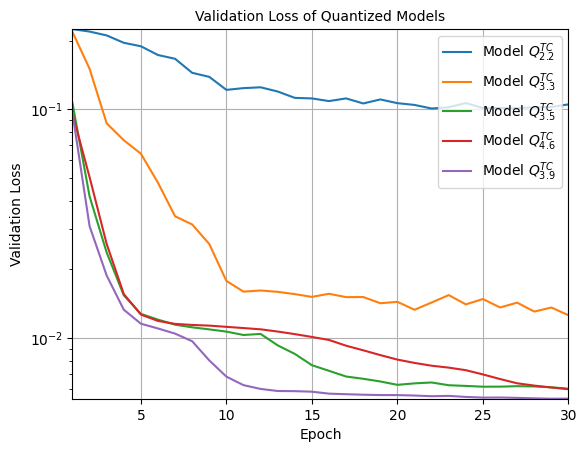

In [15]:
fig, ax = plt.subplots()

model_4_2_loss_train = model_4_2_stats['metrics']['fold_000']['loss_train']
model_4_2_loss_valid = model_4_2_stats['metrics']['fold_000']['loss_valid']

model_6_3_loss_train = model_6_3_stats['metrics']['fold_000']['loss_train']
model_6_3_loss_valid = model_6_3_stats['metrics']['fold_000']['loss_valid']

model_8_5_loss_train = model_8_5_stats['metrics']['fold_000']['loss_train']
model_8_5_loss_valid = model_8_5_stats['metrics']['fold_000']['loss_valid']

model_10_6_loss_train = model_10_6_stats['metrics']['fold_000']['loss_train']
model_10_6_loss_valid = model_10_6_stats['metrics']['fold_000']['loss_valid']

model_12_9_loss_train = model_12_9_stats['metrics']['fold_000']['loss_train']
model_12_9_loss_valid = model_12_9_stats['metrics']['fold_000']['loss_valid']

epochs_ite = np.array([idx+1 for idx in range(len(model_4_2_loss_train))])

ax.plot(epochs_ite, model_4_2_loss_valid, label=r'Model $Q^{TC}_{2.2}$') #, linestyle='solid', marker='.', color='blue')
ax.plot(epochs_ite, model_6_3_loss_valid, label=r'Model $Q^{TC}_{3.3}$')
ax.plot(epochs_ite, model_8_5_loss_valid, label=r'Model $Q^{TC}_{3.5}$')
ax.plot(epochs_ite, model_10_6_loss_valid, label='Model $Q^{TC}_{4.6}$')
ax.plot(epochs_ite, model_12_9_loss_valid, label='Model $Q^{TC}_{3.9}$')

font = {'size'   : 10}

ax.grid()
ax.legend(fontsize=font['size'], loc='upper right')
ax.margins(0)
ax.set_yscale('log')
ax.set_xlabel('Epoch', fontdict=font)
ax.set_ylabel('Validation Loss', fontdict=font)
ax.set_title(label='Validation Loss of Quantized Models', fontdict=font)

# Save Plot in runs Folder
index_folder = 'compare'
model_names = 'quantization_comparison'
folder_name = f'runs/comparisons/{datetime.now().strftime("%Y%m%d_%H%M%S")}_{index_folder}_{model_names}'
os.makedirs(folder_name, exist_ok=True)
fig.savefig(f'{folder_name}/quant_comparison.eps', format='eps')